In [1]:
import pandas as pd
import numpy as np
from datetime import date
import calendar
import json
import matplotlib.pyplot as plt

In [160]:
root_path = '/Users/amishra/DEV/DataEngineering.Labs.AirflowProject/DataEngg-Airflow/'

In [161]:
raw_file_path = root_path + 'raw/'
date_formatted = str(date.today().strftime("%Y%m%d"))

In [162]:
raw_fileIN = raw_file_path + 'INvideos.csv'
raw_fileUS = raw_file_path + 'USvideos.csv'
raw_fileCA = raw_file_path + 'CAvideos.csv'
raw_fileFR = raw_file_path + 'FRvideos.csv'
raw_fileDE = raw_file_path + 'DEvideos.csv'
raw_fileGB = raw_file_path + 'GBvideos.csv'


In [163]:
df_IN = pd.read_csv(raw_fileIN)
df_US = pd.read_csv(raw_fileUS)
df_CA = pd.read_csv(raw_fileCA)
df_FR = pd.read_csv(raw_fileFR)
df_DE = pd.read_csv(raw_fileDE)
df_GB = pd.read_csv(raw_fileGB)

In [164]:
#Adding Month column

In [165]:
df_IN['month'] = df_IN.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_US['month'] = df_US.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_CA['month'] = df_CA.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_FR['month'] = df_FR.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_DE['month'] = df_DE.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_GB['month'] = df_GB.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)

In [166]:

    country_list = ['IN', 'US', 'CA', 'FR', 'DE', 'GB']
    for i in country_list:
        with open(raw_file_path + i + '_category_id.json') as f:
            data = json.load(f)

    category_list = list()
    for c in data['items']:
        category_list.append([c['id'],c['snippet']['title']])


In [119]:
df_categoryList = pd.DataFrame(category_list, columns = ['category_id', 'category_title'])
df_categoryList
df_categoryList_asint = df_categoryList.astype({'category_id': int})

In [120]:
df_IN['month'] = df_IN.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_IN['country'] = 'India'
df_IN1 = df_IN[['month', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'country']]
df_IN1

,month,category_id,views,likes,dislikes,comment_count,country
0,November,1,1096327,33966,798,882,India
1,November,25,590101,735,904,0,India
2,November,24,473988,2011,243,149,India
3,November,23,1242680,70353,1624,2684,India
4,November,24,464015,492,293,66,India
...,...,...,...,...,...,...,...
37347,June,23,214378,3291,404,196,India
37348,June,24,406828,1726,478,1428,India
37349,June,24,386319,1216,453,697,India
37350,June,24,130263,698,115,65,India


In [121]:
df_merge_categoryIN = pd.merge(df_categoryList_asint, df_IN1, on='category_id')
df_merge_categoryIN

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,1096327,33966,798,882,India
1,1,Film & Animation,November,35885754,829362,61195,101117,India
2,1,Film & Animation,November,249423,7861,68,364,India
3,1,Film & Animation,November,696515,12397,449,385,India
4,1,Film & Animation,November,269593,3931,390,640,India
...,...,...,...,...,...,...,...,...
37242,43,Shows,June,613807,4058,1084,666,India
37243,43,Shows,June,974503,4912,1361,778,India
37244,43,Shows,June,974503,4912,1361,778,India
37245,43,Shows,June,535254,3105,1403,898,India


In [122]:
df_US['month'] = df_US.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_US['country'] = 'United States'
df_US1 = df_US[['month', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'country']]

In [123]:
df_merge_categoryUS = pd.merge(df_categoryList_asint, df_US1, on='category_id')
df_merge_categoryUS

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,826059,3543,119,340,United States
1,1,Film & Animation,November,50867,715,238,246,United States
2,1,Film & Animation,November,288922,7515,792,2111,United States
3,1,Film & Animation,November,52591,2233,187,255,United States
4,1,Film & Animation,November,1751064,16430,945,1231,United States
...,...,...,...,...,...,...,...,...
40887,43,Shows,June,1324482,22413,608,1644,United States
40888,43,Shows,June,1332252,22461,610,1648,United States
40889,43,Shows,June,1340039,22504,615,1648,United States
40890,43,Shows,June,1345086,22542,615,1649,United States


In [124]:
df_CA['month'] = df_CA.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_CA['country'] = 'Canada'
df_CA1 = df_CA[['month', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'country']]

In [125]:
df_merge_categoryCA = pd.merge(df_categoryList_asint, df_CA1, on='category_id')
df_merge_categoryCA

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,158815,218,30,186,Canada
1,1,Film & Animation,November,308568,19541,70,495,Canada
2,1,Film & Animation,November,1096327,33966,798,882,Canada
3,1,Film & Animation,November,458964,4903,392,1289,Canada
4,1,Film & Animation,November,2736733,58967,3492,7915,Canada
...,...,...,...,...,...,...,...,...
40802,43,Shows,June,628962,3436,1483,736,Canada
40803,43,Shows,June,565220,3669,1188,561,Canada
40804,43,Shows,June,613807,4058,1084,666,Canada
40805,43,Shows,June,565091,3581,1408,710,Canada


In [126]:
df_GB['month'] = df_GB.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_GB['country'] = 'United Kingdom'
df_GB1 = df_GB[['month', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'country']]

In [127]:
df_merge_categoryGB = pd.merge(df_categoryList_asint, df_GB1, on='category_id')
df_merge_categoryGB

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,2794165,8874,939,1439,United Kingdom
1,1,Film & Animation,November,3037613,91393,2766,7176,United Kingdom
2,1,Film & Animation,November,333552,13372,454,1010,United Kingdom
3,1,Film & Animation,November,44921,688,19,0,United Kingdom
4,1,Film & Animation,November,750287,8010,149,320,United Kingdom
...,...,...,...,...,...,...,...,...
38821,43,Shows,June,1664981,44245,357,4292,United Kingdom
38822,43,Shows,June,1673959,44316,357,4311,United Kingdom
38823,43,Shows,June,1686873,44434,360,4318,United Kingdom
38824,43,Shows,June,1699351,44506,361,4323,United Kingdom


In [128]:
df_FR['month'] = df_FR.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_FR['country'] = 'France'
df_FR1 = df_FR[['month', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'country']]

In [129]:
df_merge_categoryFR = pd.merge(df_categoryList_asint, df_FR1, on='category_id')
df_merge_categoryFR

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,102804,6306,179,421,France
1,1,Film & Animation,November,48796,99,19,73,France
2,1,Film & Animation,November,54031,227,35,72,France
3,1,Film & Animation,November,123529,1370,180,255,France
4,1,Film & Animation,November,6708,98,4,31,France
...,...,...,...,...,...,...,...,...
40605,43,Shows,June,613807,4058,1084,666,France
40606,43,Shows,June,565091,3581,1408,710,France
40607,43,Shows,June,720600,4303,709,627,France
40608,44,Trailers,May,3136,54,0,0,France


In [130]:
df_DE['month'] = df_DE.apply(lambda row: calendar.month_name[int(row.trending_date.split(".")[2])], axis=1)
df_DE['country'] = 'Denmark'
df_DE1 = df_DE[['month', 'category_id', 'views', 'likes', 'dislikes', 'comment_count', 'country']]

In [131]:
df_merge_categoryDE = pd.merge(df_categoryList_asint, df_DE1, on='category_id')
df_merge_categoryDE

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,62418,4749,44,425,Denmark
1,1,Film & Animation,November,286684,27188,435,943,Denmark
2,1,Film & Animation,November,149163,5452,97,280,Denmark
3,1,Film & Animation,November,31154,2107,29,444,Denmark
4,1,Film & Animation,November,123529,1370,180,255,Denmark
...,...,...,...,...,...,...,...,...
40579,43,Shows,June,628962,3436,1483,736,Denmark
40580,43,Shows,June,58703,340,174,0,Denmark
40581,43,Shows,June,565220,3669,1188,561,Denmark
40582,43,Shows,June,613807,4058,1084,666,Denmark


In [132]:
pieces = [df_merge_categoryDE,df_merge_categoryIN,df_merge_categoryUS,df_merge_categoryCA,df_merge_categoryGB,df_merge_categoryFR]
df_concatenated = pd.concat(pieces)
df_concatenated

,category_id,category_title,month,views,likes,dislikes,comment_count,country
0,1,Film & Animation,November,62418,4749,44,425,Denmark
1,1,Film & Animation,November,286684,27188,435,943,Denmark
2,1,Film & Animation,November,149163,5452,97,280,Denmark
3,1,Film & Animation,November,31154,2107,29,444,Denmark
4,1,Film & Animation,November,123529,1370,180,255,Denmark
...,...,...,...,...,...,...,...,...
40605,43,Shows,June,613807,4058,1084,666,France
40606,43,Shows,June,565091,3581,1408,710,France
40607,43,Shows,June,720600,4303,709,627,France
40608,44,Trailers,May,3136,54,0,0,France


In [133]:
# df_concatenated.plot(x="category_title", y=["likes", "dislikes", "comment_count"], kind="bar")
# plt.show()

In [134]:
# df_concatenated['ratio'] = np.where(df_concatenated['dislikes'] == 0, 0, df_concatenated['likes']/df_concatenated['dislikes'])
# df_concatenated

In [135]:
# df_likes_over_dislikes = df_concatenated.groupby(['country','category_title'])['ratio'].mean()
# df_likes_over_dislikes

In [136]:
# df_concatenated.plot(kind='bar',x='country',y='likes',color='red')
# plt.show()

In [137]:
df1_reduced = df_concatenated.filter(['likes', 'dislikes','views', 'country','category_title', 'comment_count'], axis=1)

In [138]:
df_grouped = df1_reduced.groupby('country')['likes','dislikes'].sum()
df_grouped

# df1.plot(x="country", y=["likes", "dislikes"], kind="bar")

/Users/amishra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,likes,dislikes
country,,
Canada,1607937265,79812112
Denmark,878794585,53052539
France,702156706,31957415
India,1011375558,62185412
United Kingdom,5210510328,290813530
United States,3026331552,148667774


Text(0, 0.5, 'Likes/Dislikes')

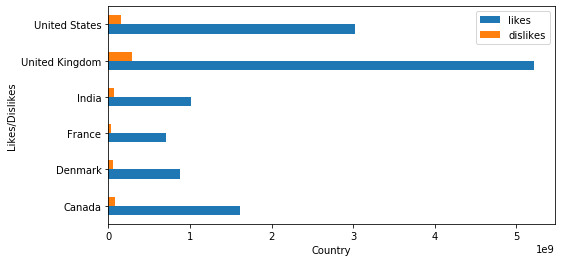

In [139]:
fig, ax = plt.subplots(figsize=(8,4))
df_grouped.plot(kind='barh',ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Likes/Dislikes')

In [140]:
report_name = "/Users/amishra/DEV/AirflowProject/youtube_analysis_likes_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')

In [141]:
df_grouped1 = df1_reduced.groupby('category_title')['likes','dislikes'].sum()
df_grouped1

/Users/amishra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,likes,dislikes
category_title,,
Autos & Vehicles,20811096,979224
Comedy,935473131,30159084
Education,111088716,3420767
Entertainment,2444170624,217151438
Film & Animation,530406633,22652042
Gaming,248969136,17359338
Howto & Style,303934248,11054249
Movies,1003685,50104
Music,6556219002,270435932


Text(0, 0.5, 'Likes/Dislikes')

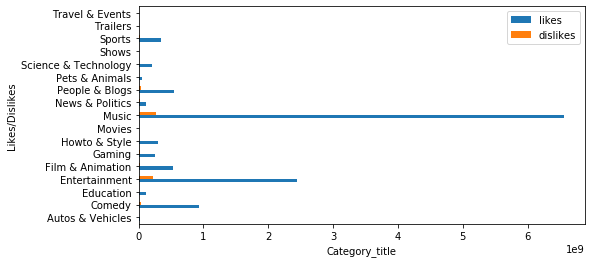

In [142]:
fig, ax = plt.subplots(figsize=(8,4))
df_grouped1.plot(kind='barh',ax=ax)
ax.set_xlabel('Category_title')
ax.set_ylabel('Likes/Dislikes')


In [143]:
report_name = "/Users/amishra/DEV/AirflowProject/report/youtube_analysis_category_likes_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')

In [144]:
df2 = df1_reduced.groupby('country')['category_title'].count()
df2

country
Canada            40807
Denmark           40584
France            40610
India             37247
United Kingdom    38826
United States     40892
Name: category_title, dtype: int64

Text(0, 0.5, 'category_title')

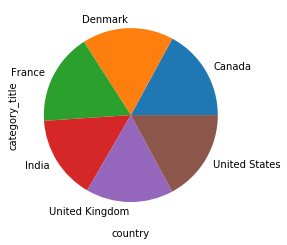

In [145]:
fig, ax = plt.subplots(figsize=(8,4))
df2.plot(kind='pie',ax=ax)
ax.set_xlabel('country')
ax.set_ylabel('category_title')


In [146]:
report_name = "/Users/amishra/DEV/AirflowProject/report/category_country_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')

In [147]:
df_views = df1_reduced.groupby('category_title')['views'].sum()
df_views

category_title
Autos & Vehicles          1191203153
Comedy                   19214042009
Education                 2566838759
Entertainment            92064416642
Film & Animation         25108776049
Gaming                    6520609277
Howto & Style             8634558283
Movies                      70259728
Music                   245334769806
News & Politics           7832754385
People & Blogs           18738268524
Pets & Animals            1681882649
Science & Technology      8065799956
Shows                      393883758
Sports                   16058797531
Trailers                       21744
Travel & Events            650426123
Name: views, dtype: int64

Text(0, 0.5, 'views')

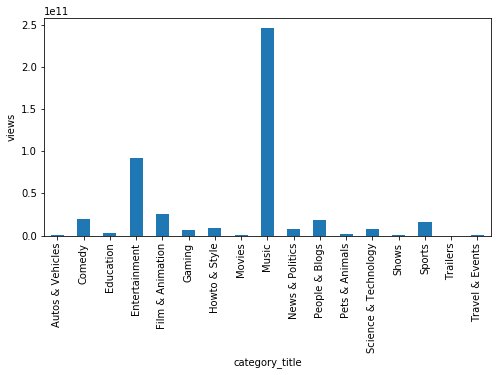

In [148]:
fig, ax = plt.subplots(figsize=(8,4))
df_views.plot(kind='bar',ax=ax)
ax.set_xlabel('category_title')
ax.set_ylabel('views')


In [149]:
report_name = "/Users/amishra/DEV/AirflowProject/report/category_views_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')

In [150]:
df_views1 = df1_reduced.groupby('country')['views'].sum()
df_views1

country
Canada             46776373446
Denmark            24485953077
France             17041407308
India              39604345873
United Kingdom    229716399912
United States      96502828760
Name: views, dtype: int64

Text(0, 0.5, 'views')

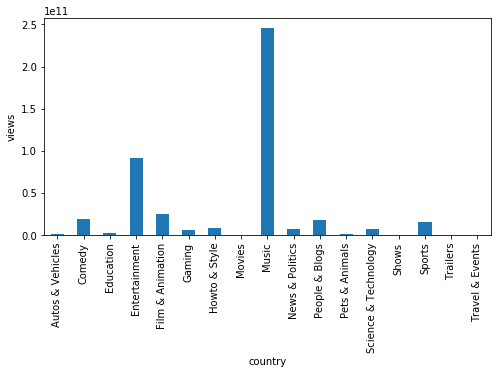

In [151]:
fig, ax = plt.subplots(figsize=(8,4))
df_views.plot(kind='bar',ax=ax)
ax.set_xlabel('country')
ax.set_ylabel('views')


In [152]:
report_name = "/Users/amishra/DEV/AirflowProject/report/country_views_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')

In [153]:
df_comment_count = df1_reduced.groupby('country')['comment_count'].sum()
df_comment_count

country
Canada            202939308
Denmark           109893659
France             72776211
India              99978364
United Kingdom    501673561
United States     341079367
Name: comment_count, dtype: int64

Text(0, 0.5, 'comment_count')

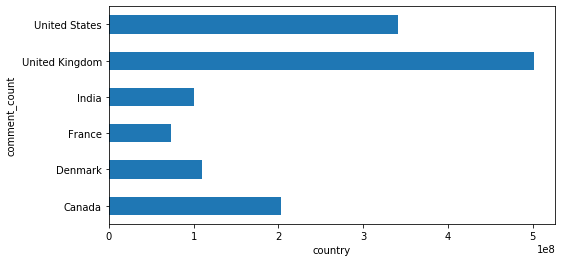

In [154]:
fig, ax = plt.subplots(figsize=(8,4))
df_comment_count.plot(kind='barh',ax=ax)
ax.set_xlabel('country')
ax.set_ylabel('comment_count')


In [155]:
report_name = "/Users/amishra/DEV/AirflowProject/report/country_commentCount_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')

In [156]:
df_comment_count1 = df1_reduced.groupby('category_title')['comment_count'].sum()
df_comment_count1

category_title
Autos & Vehicles          3257344
Comedy                   90698925
Education                12647380
Entertainment           340193588
Film & Animation         57582056
Gaming                   38947871
Howto & Style            43140068
Movies                      55636
Music                   543407983
News & Politics          33632592
People & Blogs           75995320
Pets & Animals            6779425
Science & Technology     39261853
Shows                      470471
Sports                   40423205
Trailers                        0
Travel & Events           1846753
Name: comment_count, dtype: int64

Text(0, 0.5, 'comment_count')

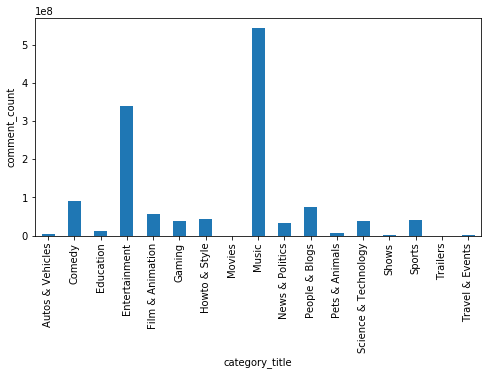

In [157]:
fig, ax = plt.subplots(figsize=(8,4))
df_comment_count1.plot(kind='bar',ax=ax)
ax.set_xlabel('category_title')
ax.set_ylabel('comment_count')


In [158]:
report_name = "/Users/amishra/DEV/AirflowProject/report/category_commentCount_" + str(date.today().strftime("%Y%m%d"))
fig.savefig(report_name, dpi=300, bbox_inches='tight')